### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):

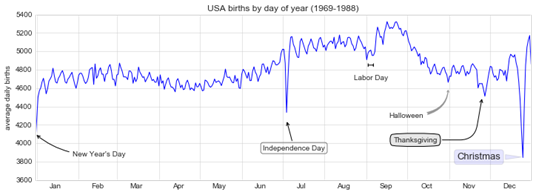

![title](https://github.com/suthapalliuday/Rough-Work/blob/main/SciBERT_cm.png)

In [1]:
#### You code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl

warnings.filterwarnings('ignore')
df = pd.read_csv('births.csv')
df.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


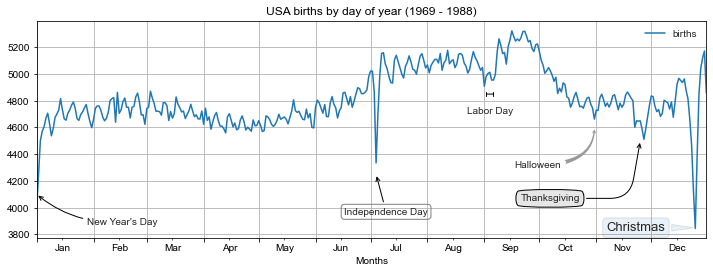

In [3]:
percentiles = np.percentile(df['births'], [25, 50, 75])
mean, std = percentiles[1], 0.74 * (percentiles[2] - percentiles[0])
births = df.query('(births > @mean - 5 * @std) & (births < @mean + 5 * @std)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


fig, ax = plt.subplots(figsize=(12, 4))
plt.style.use('seaborn-whitegrid')
plt.title("USA births by day of year (1969 - 1988)")
plt.xlabel("Months")
births_by_date.plot(ax=ax);

style = dict(size=10, color='gray')

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 

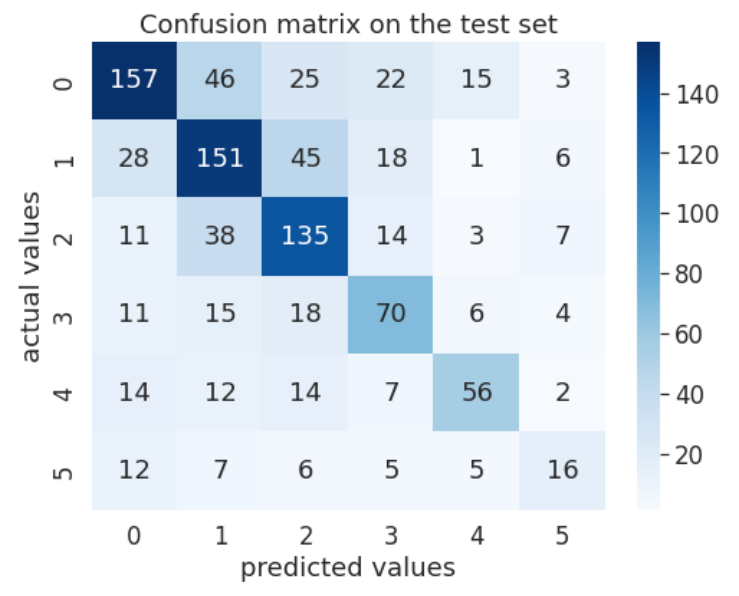

In [18]:
#### You code here

import pandas as pd
import numpy as np

confusion_matrix = [[157,46,25,22,15,3],
              [28,151,45,18,1,6],
              [11,38,135,14,3,7],
              [11,15,18,70,6,4],
              [14,12,14,7,56,2],
              [12,7,6,5,5,16]]


confusion_matrix = np.array(confusion_matrix)

def calculate_metric(confusion_matrix):
    for item in range(len(confusion_matrix)):
        TP = confusion_matrix[item,item]
        FP = confusion_matrix[item,:].sum() - TP

        FN = confusion_matrix[:,item].sum() - TP
        TN = confusion_matrix.sum().sum() - (TP+FP+FN)

        Acc = (TP+TN)/(confusion_matrix.sum().sum())
        Pre = (TP)/(TP+FP)
        Rec = (TP)/(TP+FN)
        F1 = (2*Pre*Rec)/(Pre+Rec)

        print('\n')
        print('Evaluation metric for class',round(item))
        print('Accuracy: ', round(Acc,3))
        print('Precision: ', round(Pre,3))
        print('Recall: ', round(Rec,3))
        print('F1-Score: ',round(F1,3))
        

calculate_metric(confusion_matrix)




Evaluation metric for class 0
Accuracy:  0.814
Precision:  0.586
Recall:  0.674
F1-Score:  0.627


Evaluation metric for class 1
Accuracy:  0.785
Precision:  0.606
Recall:  0.561
F1-Score:  0.583


Evaluation metric for class 2
Accuracy:  0.82
Precision:  0.649
Recall:  0.556
F1-Score:  0.599


Evaluation metric for class 3
Accuracy:  0.881
Precision:  0.565
Recall:  0.515
F1-Score:  0.538


Evaluation metric for class 4
Accuracy:  0.921
Precision:  0.533
Recall:  0.651
F1-Score:  0.586


Evaluation metric for class 5
Accuracy:  0.943
Precision:  0.314
Recall:  0.421
F1-Score:  0.36


<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [5]:
#### You code here

#create df
intrusion = pd.read_csv('inetd-intrusion.int', sep = " ",header = None)
normal = pd.read_csv('inetd-normal.int',sep = " ",header = None)

#add column name
intrusion.columns = ['pid', 'sys_call']
normal.columns =  ['pid', 'sys_call']

print(normal.head())
print('\n')
print(intrusion.head())


   pid  sys_call
0  167        90
1  167       125
2  167       125
3  167       106
4  167         5


   pid  sys_call
0  167        90
1  167       125
2  167       125
3  167       106
4  167         5


In [6]:
#Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string.

combine_normal = {}
combine_intrusion = {}

for pid in list(set(normal['pid'].values)):
    combine_normal[pid] = " ".join(str(value) for value in list(normal[normal['pid'] == pid]['sys_call'].values))

for pid in list(set(intrusion['pid'].values)):
    combine_intrusion[pid] = " ".join(str(value) for value in list(intrusion[intrusion['pid'] == pid]['sys_call'].values))
    
#print(combine_normal)
#print(combine_intrusion)


In [7]:
#Parse an entire sequence into smaller sequences of size 25.
from nltk.util import ngrams

parse_normal = []
parse_intrusion = []

for key in combine_normal.keys():
    s = combine_normal[key]
    tokens = [token for token in s.split(" ") if token != ""]
    
    for item in list(ngrams(tokens, 25)):
        parse_normal.append(item) 
        
for key in combine_intrusion.keys():
    s = combine_intrusion[key]
    tokens = [token for token in s.split(" ") if token != ""]
    
    for item in list(ngrams(tokens, 25)):
        parse_intrusion.append(item)

#print(parse_normal)
##print(parse_intrusion)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

normal_df = pd.DataFrame(parse_normal)
intrusion_df = pd.DataFrame(parse_intrusion)

normal_df['type'] = 'normal'
intrusion_df['type'] = 'intrusion'


new_df = pd.DataFrame()
new_df = new_df.append(intrusion_df)
new_df = new_df.append(normal_df)

#make sure that the testing data only contain unique sequences
new_df = new_df.drop_duplicates(subset = new_df.columns[:-1], keep = 'last')

X = new_df.drop("type", axis = 1)
y = new_df['type']

#print(normal_df.shape)
#print(intrusion_df.shape)
#print(new_df.shape)

#partition the labeled data into training data and testing data with a ratio of 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Decision Tree model using
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   intrusion       0.93      0.93      0.93        57
      normal       0.91      0.91      0.91        43

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

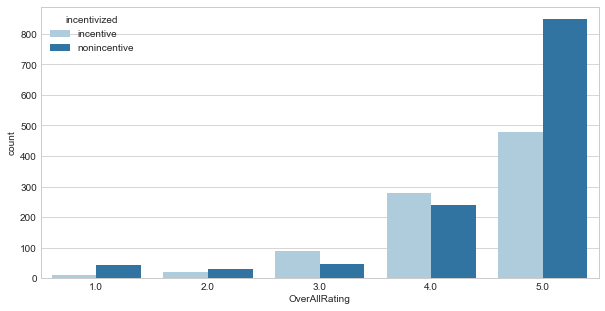

In [9]:
#### You code and your answer here here

import pandas as pd
import seaborn as sns


with open('Software_Reviews_csv_files_S.csv', 'r') as f_in, open('file_single_header.csv', 'w') as f_out:
    header = f_in.readlines(1)[0]
    f_out.write(header)
    for line in f_in.readlines():
        if line != header:
            f_out.write(line)

# then read corrected csv file
data = pd.read_csv('file_single_header.csv')

data=data.dropna()
data['OverAllRating'] = data['OverAllRating'].astype('float')


#Replace gender by text label for readability and disregard other None value
update_col = {"VendorReferredIncentivized":'incentive', 
              "NominalGift": 'incentive',
              "NoIncentive": "nonincentive",
              "NonNominalGift": "nonincentive",
              "VendorReferred":"nonincentive"
             }

data=data.dropna()
data = data[data.incentivized != 'None']
data.incentivized = [update_col[item] for item in data.incentivized]
#data.head()

data = data[['incentivized', 'OverAllRating']]
#data.head()
plt.figure(figsize=(10, 5))

sns.countplot(data=data, x="OverAllRating", hue="incentivized",palette='Paired')

group_A = data[(data['incentivized'] == 'incentive')]
group_B = data[(data['incentivized'] == 'nonincentive')]


Nonincetivezed group has higher 5 stars rating 
incentivized group have hight 3 stars and 4 stars rating


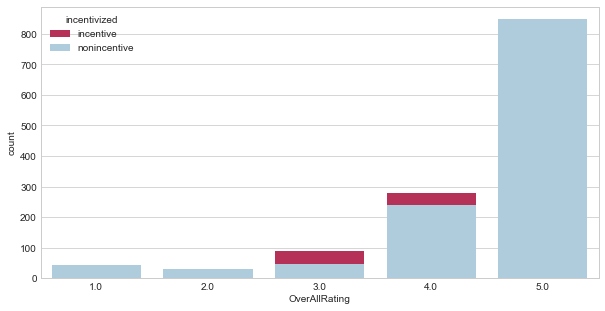

In [10]:
plt.figure(figsize=(10, 5))

sns.countplot(data=group_A, x="OverAllRating", hue="incentivized",  palette='rocket')
sns.countplot(data=group_B, x="OverAllRating", hue="incentivized", palette='Paired')


print('Nonincetivezed group has higher 5 stars rating \nincentivized group have hight 3 stars and 4 stars rating')